# Imports

In [47]:
# common / KNN imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import scipy.spatial.distance
from collections import Counter
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
plt.set_cmap('gray')

<Figure size 1080x576 with 0 Axes>

In [2]:
#-----------------------------------------------
# Load MNIST Data
#-----------------------------------------------
mnist_data = tf.keras.datasets.mnist.load_data()

# Get Training set
train = mnist_data[0]
x_mnist_train_full, y_mnist_train_full = train[0], train[1]

# Get Test set
test = mnist_data[1]
x_mnist_test_full, y_mnist_test_full = test[0], test[1]

n_mnist_train = x_mnist_train_full.shape[0]
n_mnist_test =x_mnist_test_full.shape[0]

m = x_mnist_train_full.shape[1]**2

x_mnist_train_full = x_mnist_train_full.reshape([n_mnist_train, m])
x_mnist_test_full = x_mnist_test_full.reshape([n_mnist_test, m])


In [3]:
#-----------------------------------------------
# Create MNIST Subset
#-----------------------------------------------

# Create train subset
idx = np.random.randint(n_mnist_train, size= 1000)
x_mnist_train = x_mnist_train_full[idx]
y_mnist_train = y_mnist_train_full[idx]

# Create test subset
idx = np.random.randint(n_mnist_test, size= 30)
x_mnist_test = x_mnist_test_full[idx]
y_mnist_test = y_mnist_test_full[idx]

def set_mnist_subsets(train_size, test_size):
    global n_mnist_train
    global n_mnist_test
    global x_mnist_train
    global y_mnist_train
    global x_mnist_test
    global y_mnist_test
    
    idx = np.random.randint(n_mnist_train, size= train_size)
    x_mnist_train = x_mnist_train_full[idx]
    y_mnist_train = y_mnist_train_full[idx]
    idx = np.random.randint(n_mnist_test, size= test_size)
    x_mnist_test = x_mnist_test_full[idx]
    y_mnist_test = y_mnist_test_full[idx]

In [4]:
#-----------------------------------------------
# Load CIFAR data
#-----------------------------------------------

cifar = tf.keras.datasets.cifar10.load_data()[0]
x_cifar, y_cifar = cifar[0], cifar[1]

# Convert to grayscale
x_cifar = np.dot(x_cifar[...,:3], [0.299, 0.587, 0.114])
print(x_cifar.shape)

n_x_cifar = x_cifar.shape[0]
m_x_cifar = x_cifar.shape[1]**2

x_cifar = x_cifar.reshape([n_x_cifar, m_x_cifar])


170500096/170498071 [==============================] - 245s 1us/step
(50000, 32, 32)


In [5]:
#-----------------------------------------------
# Create Cifar Subset
#-----------------------------------------------
idx = np.random.randint(n_x_cifar, size=1030)
x_cifar_sample = x_cifar[idx]
y_cifar_sample = y_cifar[idx]

# Create test & train set
x_cifar_test = x_cifar_sample[:30]
y_cifar_test = y_cifar_sample[:30,0]

x_cifar_train = x_cifar_sample[30:]
y_cifar_train = y_cifar_sample[30:,0]

def set_cifar_subsets(train_size, test_size):
    global n_x_cifar
    global x_cifar_train
    global y_cifar_train
    global x_cifar_test
    global y_cifar_test
    
    idx = np.random.randint(n_x_cifar, size= train_size + test_size)
    x_cifar_sample = x_cifar[idx]
    y_cifar_sample = y_cifar[idx]

    # Create test & train set
    x_cifar_test = x_cifar_sample[:test_size]
    y_cifar_test = y_cifar_sample[:test_size,0]

    x_cifar_train = x_cifar_sample[test_size:]
    y_cifar_train = y_cifar_sample[test_size:,0]


print(x_cifar_test.shape)
print(y_cifar_test.shape)
print(x_cifar_train.shape)
print(y_cifar_train.shape)
print(y_cifar_train[1])

(30, 1024)
(30,)
(1000, 1024)
(1000,)
0


# Aufgaben

## A KNN

#### How many distances you need to calculate if you have 60,000 samples in the trainingset for 50 samples?
Man muss 3.000.000 Abstände berechnen.
#### How many distances do you need to calculate if you have n samples im the trainingset?
Man muss immer n * 50 Abstände berechnen, d.h. bei 3 Samples müsste man 150 Abstände berechnen, bei 90.000 dann 4.500.000

## B KNN

In [6]:
def knn(k, x_train, y_train, x_test):
    dists = scipy.spatial.distance.cdist(x_train, x_test, metric='euclid')
    idx_nearest = np.argpartition(dists, k, axis=0)[:k]
    idx_nearest = np.swapaxes(idx_nearest, 0, 1)
    #print(idx_nearest)

    closest_points_labels = y_train[idx_nearest]
    y_test_predictions = []
    
    for index, predicted_labels in enumerate(closest_points_labels):
        y_test_predictions.append(np.bincount(predicted_labels).argmax())
    return y_test_predictions

In [7]:
def knn_print_error_rate(y_test,  y_test_predictions):
    
    correct = 0
    
    correct_labels = (y_test)
    
    numbers_count = Counter(correct_labels)
    
    numbers_correct = dict.fromkeys(numbers_count.keys(), 0)
    
    #numbers_error_rate = dict.fromkeys(numbers_count.keys(), None)
    
    
    n = correct_labels.shape[0]
    
    for index, prediction in enumerate( y_test_predictions):
        if prediction == correct_labels[index]:
            correct += 1
            numbers_correct[prediction] += 1
        
    error_rate = 1- (correct / n)
    
    
    for key in sorted(numbers_count):
        count = numbers_count[key]
        correct = numbers_correct[key]
        error = 1 - numbers_correct[key] / numbers_count[key]
        print("Label:", key)
        print("  ", correct, "out of", count, "recognized correctly | Errorrate:", error*100, "%")
        
    print("\n"+"Resulting errorrate:", error_rate*100, "%")

In [8]:
set_mnist_subsets(10000,30)

In [9]:
predictions2 = knn(2, x_mnist_train, y_mnist_train, x_mnist_test)
predictions4 = knn(4, x_mnist_train, y_mnist_train, x_mnist_test)
predictions8 = knn(8, x_mnist_train, y_mnist_train, x_mnist_test)

print(list(y_mnist_test), "\n")

print("-------------------------------------")
print("  2NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions2, "\n")
knn_print_error_rate(y_mnist_test, predictions2)

print("-------------------------------------")
print("  4NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions4, "\n")
knn_print_error_rate(y_mnist_test, predictions4)

print("-------------------------------------")
print("  8NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions8, "\n")
knn_print_error_rate(y_mnist_test,predictions8)


[2, 9, 4, 5, 0, 4, 0, 2, 6, 3, 7, 0, 5, 4, 4, 1, 6, 0, 3, 2, 0, 4, 2, 3, 6, 0, 1, 9, 7, 8] 

-------------------------------------
  2NN  
-------------------------------------
Predictions:
[2, 9, 4, 5, 0, 2, 0, 2, 6, 3, 7, 0, 3, 4, 4, 1, 6, 0, 3, 2, 0, 6, 2, 3, 6, 0, 1, 9, 7, 8] 

Label: 0
   6 out of 6 recognized correctly | Errorrate: 0.0 %
Label: 1
   2 out of 2 recognized correctly | Errorrate: 0.0 %
Label: 2
   4 out of 4 recognized correctly | Errorrate: 0.0 %
Label: 3
   3 out of 3 recognized correctly | Errorrate: 0.0 %
Label: 4
   3 out of 5 recognized correctly | Errorrate: 40.0 %
Label: 5
   1 out of 2 recognized correctly | Errorrate: 50.0 %
Label: 6
   3 out of 3 recognized correctly | Errorrate: 0.0 %
Label: 7
   2 out of 2 recognized correctly | Errorrate: 0.0 %
Label: 8
   1 out of 1 recognized correctly | Errorrate: 0.0 %
Label: 9
   2 out of 2 recognized correctly | Errorrate: 0.0 %

Resulting errorrate: 9.999999999999998 %
-------------------------------------
  4NN

##### What is the error rate of KNN on the test set?
Die Errorrate beim ersten Testen (mit k=2, train = 10.000, test = 30) war 6%.  
Beim testen mit neuen subsets gab es auch Errorraten zwischen 3 - 16%
##### What is the error rate for each label (number)?
Die Errorraten beim ersten Testen (mit k=2) waren:
* 0 - 0.0%
* 1 - 0.0%
* 2 - 0.0%
* 3 - 0.0%
* 4 - 33.0% (2/3)
* 5 - 20.0% (4/5)
* 6 - 0.0%
* 7 - 0.0%
* 8 - 0.0%
* 9 - 0.0%  
  
Beim testen mit anderen Subsets fällt auf, dass es bei den Zahlen 0-2 tendenziell niedrigere Fehlerquoten gibt als beim Rest.
##### How does the choice of k influence the result?
Beim ersten Testen hat sich die Errorrate mit zunehmendem k verbessert:

* k = 2: 6%
* k = 4: 3%
* k = 8: 3%  
  
Beim Testen mit anderen Subsets ist aufgefallen, dass k sich nicht immer auf die Errorquote auswirkt, aber k=4 tendenziell niedrigere Errorraten für unsere Test- und Traingrößen hatte.

## C K-means MNIST

In [17]:
def kmeans_train(k, it, x_train, y_train):
    
    # init centroids
    idx_centroid = np.random.randint(x_train.shape[0], size=k)
    centroids = x_train[idx_centroid]
    
    # calc distances
    dists = scipy.spatial.distance.cdist(x_train, centroids, metric='euclid')
    
    # find nearest centroids
    labels = np.argmin(dists, axis=1)

    # train model for q iterations
    for j in range(it):
        
        # calc distances
        dists = scipy.spatial.distance.cdist(x_train, centroids, metric='euclid')
        
        # label according to nearest centroids
        labels = np.argmin(dists, axis=1)
        
        # get new centroids
        centroid_list = [x_train[labels == i].mean(0) for i in range(k)]
        centroids = np.stack(centroid_list)
        
        
        # print results

    for i in range(k):
    
        size = y_train[labels == i].shape[0]
        bincount = np.bincount(y_train[labels == i])
        mode = bincount.argmax()
        correct = bincount[mode]
        percentage = correct / size
    
        print('group', i)
        print("-------------------------------------")
        print("majority label", mode, "(size:", size, ")")
        print("correct", correct)
        print("size", size)
        print("Percentage of majority class:", percentage*100, "%", "\n")

In [11]:
set_mnist_subsets(1000,30)

In [12]:
k_mnist = 10
itr_means = 30

_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
embedding = _tsne.fit_transform(x_mnist_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.059s...
[t-SNE] Computed neighbors for 1000 samples in 3.396s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 647.825039
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.246094
[t-SNE] KL divergence after 300 iterations: 1.172977


In [13]:
kmeans_train(k_mnist, itr_means, x_mnist_train, y_mnist_train)

group 0
-------------------------------------
label 4 (size: 154 )
correct 59
size 154
Percentage of majority class: 38.311688311688314 % 

group 1
-------------------------------------
label 6 (size: 90 )
correct 76
size 90
Percentage of majority class: 84.44444444444444 % 

group 2
-------------------------------------
label 0 (size: 43 )
correct 41
size 43
Percentage of majority class: 95.34883720930233 % 

group 3
-------------------------------------
label 0 (size: 54 )
correct 51
size 54
Percentage of majority class: 94.44444444444444 % 

group 4
-------------------------------------
label 1 (size: 116 )
correct 44
size 116
Percentage of majority class: 37.93103448275862 % 

group 5
-------------------------------------
label 3 (size: 111 )
correct 57
size 111
Percentage of majority class: 51.35135135135135 % 

group 6
-------------------------------------
label 2 (size: 75 )
correct 65
size 75
Percentage of majority class: 86.66666666666667 % 

group 7
--------------------------

#### Do this for 10, 100, 1000 iterations
##### What is the majority class of each cluster?
##### What is the percentage of the majority class in each cluster?
##### Does each number have a cluster?
##### If not, which hasn’t?


## D MNIST understanding

##### Some numbers are more difficult to predict with KNN and to cluster with K-means. Show why.  Start with examples, and get more general

## E KNN and K-means CIFAR

In [14]:
set_cifar_subsets(10000,50)

In [15]:
predictions2 = knn(2, x_cifar_train, y_cifar_train, x_cifar_test)
predictions4 = knn(4, x_cifar_train, y_cifar_train, x_cifar_test)
predictions8 = knn(8, x_cifar_train, y_cifar_train, x_cifar_test)

print(list(y_cifar_test), "\n")

print("-------------------------------------")
print("  2NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions2, "\n")
knn_print_error_rate(y_cifar_test, predictions2)

print("-------------------------------------")
print("  4NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions4, "\n")
knn_print_error_rate(y_cifar_test, predictions4)

print("-------------------------------------")
print("  8NN  ")
print("-------------------------------------")
print("Predictions:")
print(predictions8, "\n")
knn_print_error_rate(y_cifar_test,predictions8)


[3, 8, 9, 2, 7, 0, 7, 7, 1, 9, 8, 1, 3, 2, 2, 7, 5, 7, 1, 3, 9, 8, 7, 7, 3, 9, 6, 2, 0, 5, 6, 7, 2, 2, 5, 5, 0, 2, 7, 8, 7, 8, 2, 5, 4, 6, 7, 0, 3, 7] 

-------------------------------------
  2NN  
-------------------------------------
Predictions:
[3, 8, 0, 2, 0, 4, 0, 3, 1, 1, 0, 8, 0, 2, 4, 3, 2, 2, 2, 0, 8, 8, 4, 2, 3, 8, 0, 2, 0, 5, 4, 3, 2, 0, 3, 2, 8, 8, 2, 2, 7, 2, 4, 2, 8, 8, 7, 8, 3, 2] 

Label: 0
   1 out of 4 recognized correctly | Errorrate: 75.0 %
Label: 1
   1 out of 3 recognized correctly | Errorrate: 66.66666666666667 %
Label: 2
   4 out of 8 recognized correctly | Errorrate: 50.0 %
Label: 3
   3 out of 5 recognized correctly | Errorrate: 40.0 %
Label: 4
   0 out of 1 recognized correctly | Errorrate: 100.0 %
Label: 5
   1 out of 5 recognized correctly | Errorrate: 80.0 %
Label: 6
   0 out of 3 recognized correctly | Errorrate: 100.0 %
Label: 7
   2 out of 12 recognized correctly | Errorrate: 83.33333333333334 %
Label: 8
   2 out of 5 recognized correctly | Errorrate:

In [16]:
set_cifar_subsets(1000,30)
k_cifar = 10
itr_means = 30
kmeans_train(k_cifar, itr_means, x_cifar_train, y_cifar_train)

group 0
-------------------------------------
label 5 (size: 87 )
correct 16
size 87
Percentage of majority class: 18.39080459770115 % 

group 1
-------------------------------------
label 9 (size: 126 )
correct 37
size 126
Percentage of majority class: 29.365079365079367 % 

group 2
-------------------------------------
label 7 (size: 154 )
correct 27
size 154
Percentage of majority class: 17.532467532467532 % 

group 3
-------------------------------------
label 0 (size: 68 )
correct 11
size 68
Percentage of majority class: 16.176470588235293 % 

group 4
-------------------------------------
label 2 (size: 105 )
correct 21
size 105
Percentage of majority class: 20.0 % 

group 5
-------------------------------------
label 8 (size: 63 )
correct 25
size 63
Percentage of majority class: 39.682539682539684 % 

group 6
-------------------------------------
label 5 (size: 62 )
correct 15
size 62
Percentage of majority class: 24.193548387096776 % 

group 7
-----------------------------------

transform cifar-10 to grayscale.
* Does knn work similarly good?
* Does k-means work similarly good?
* Demonstrate this similar to B, C and D

## F Linear regression BOSTON

Train a linear regression model on the BOSTON dataset to predict median
values of houses. Test it on the test set. Show the code how you did it! What
dependent variables (columns) have the biggest influence?

 RM and lstat have the biggest influence 


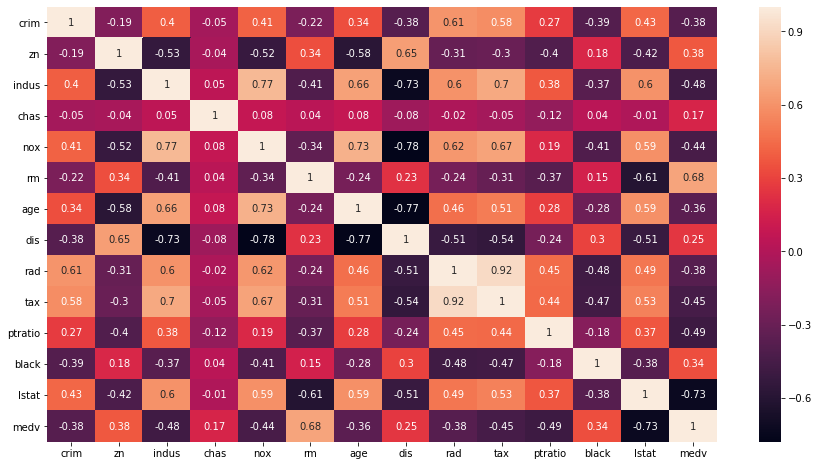

In [38]:
plt.rcParams['figure.figsize'] = [15, 8]

np.set_printoptions(suppress=True)

boston = tf.keras.datasets.boston_housing.load_data()[0]
X = boston[0]
Y = boston[1]


c = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax", "ptratio", "black", "lstat", 'medv']
boston = pd.DataFrame({c: X[:, i] for i, c in enumerate(c[:-1])})
boston[c[-1]] = Y
#add median 
np.median(boston)

boston.head()

#Correlation Matrix
correlation_matrix = boston.corr().round(2)

sns.heatmap(data= correlation_matrix, annot=True)

print(" RM and lstat have the biggest influence ")

#Variables with the biggest influence 

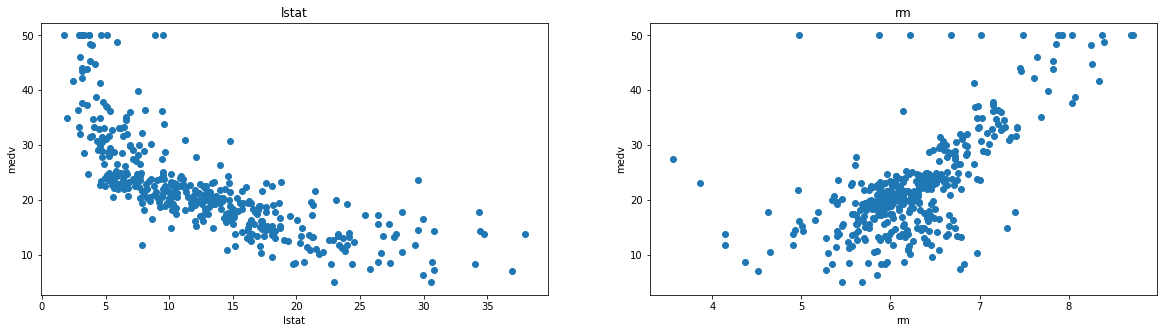

In [41]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')
    
    #the price increases linearly as the value of rm increases
    #the price decreases linearly as the value of lstat increases

#### Linear Regression 

In [53]:
boston = tf.keras.datasets.boston_housing.load_data()
X_train = boston[0][0]
Y_train = boston[0][1]

X_test = boston[0][0]
Y_test = boston[0][1]

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(sklearn.metrics.mean_squared_error(Y_train, y_train_predict)))
r2 = sklearn.metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(sklearn.metrics.mean_squared_error(Y_test, y_test_predict)))
r2 = sklearn.metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.690927502994279
R2 score is 0.7399643695249463


The model performance for testing set
--------------------------------------
RMSE is 4.690927502994279
R2 score is 0.7399643695249463


## G Logistik regression MNIST

Evalute logistic regression as B and D on MNIST

## H Feedback

How much time did you work on this assignment and how often did you
meet?
* Did you use Google Colab or Anaconda?
* What was your favourite excercise? Why?
* What excercise did you like least? Why?